In [1]:
from sklearn import datasets, model_selection, naive_bayes
import numpy as np

In [10]:
from pandas import DataFrame

Загружаем датасеты

In [2]:
digits = datasets.load_digits()
bc = datasets.load_breast_cancer()

Ознакомимся с предлагаемыми признаками этих датасетов.

In [23]:
print(digits.DESCR)
digits_frame = DataFrame(digits.data[:10])
digits_frame.columns = range(64)
digits_frame['target'] = digits.target[:10]
digits_frame

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [25]:
print(bc.DESCR)
bc_frame = DataFrame(bc.data[::50])
bc_frame.columns = bc.feature_names
bc_frame['target'] = bc.target[::50]
bc_frame

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,11.76,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.01115,0.1495,0.05888,...,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563,1
2,13.61,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.04489,0.1609,0.05871,...,35.27,108.60,906.5,0.12650,0.19430,0.31690,0.11840,0.2651,0.07397,0
3,13.00,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,0.06087,...,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435,1
4,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.04107,0.1979,0.06013,...,28.36,92.15,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174,1
5,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.271200,0.13100,0.2205,0.05898,...,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849,0
6,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.219700,0.10620,0.1792,0.06552,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,0
7,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1
8,17.91,21.02,124.40,994.0,0.12300,0.25760,0.318900,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,0
9,11.87,21.54,76.83,432.0,0.06613,0.10640,0.087770,0.02386,0.1349,0.06612,...,28.18,83.51,507.2,0.09457,0.33990,0.32180,0.08750,0.2305,0.09952,1


Сравним метрики качества для трёх распределений в наивном байесовском классификаторе для этих двух датасетов.

BernoulliNB - многомерное бернуллиевское распределение

MultinomialNB - мультиномиальное распределение

GaussianNB - многомерное нормальное распределение

Заметим особенности каждого из предлагаемых распределений.

Многомерное бернуллиевское распределение по каждой координате (по каждому признаку) принимает одно из значений 0 и 1 с некоторой вероятностью. Разумно ожидать, что оно хорошо работает с логическими ("да"/"нет") признаками и неудовлетворительно - с числовыми, порядковыми и прочими. При этом, согласно документации, числовые данные бинаризуются, и по умолчанию порог равен 0.

Мультиномиальное распределение принимает целые неотрицательные значения из ограниченного набора, причём наиболее вероятно выпадение значений, близких к средним. Это распределение должно хорошо моделировать выборки с дискретными (целыми) числовыми признаками, колеблющимися вокруг типичного значения. Поскольку мультиномиальное распределение из двух значений по одной координате вырождается в бернуллиевское, модель также должна удовлетворительно описывать логические признаки. Для всех остальных видов признаков, включая несимметрично распределённые числовые, целесообразность её применения сомнительна.

Наконец, многомерное нормальное распределение в целом аналогично мультиномиальному, но является непрерывным. Соответственно, оно ведёт себя так же, но признаки должны иметь непрерывный (физические величины, координаты) или слабо дискретизованный (деньги, дата и время в больших масштабах) характер, и могут принимать отрицательные значения.

Для датасета digits, где данные представлены в виде дискретных яркостей от 0 до 16, больше подходит мультиномиальное распределение. Учитывая, что значение имеют только наиболее яркие фрагменты изображения, может быть оправданным биномиальное распределение с некоторым порогом бинаризации для яркостей. Для датасета breast_cancer, где признаками являются измеренные значения физических величин, больше подходит нормальное распределение.

Проверим наши предположения с помощью кросс-валидации.

In [9]:
digits_scores = ['digits', model_selection.cross_val_score(naive_bayes.BernoulliNB(), digits.data, digits.target).mean(),
                 model_selection.cross_val_score(naive_bayes.MultinomialNB(), digits.data, digits.target).mean(),
                 model_selection.cross_val_score(naive_bayes.GaussianNB(), digits.data, digits.target).mean()]
bc_scores = ['breast_cancer', model_selection.cross_val_score(naive_bayes.BernoulliNB(), bc.data, bc.target).mean(),
             model_selection.cross_val_score(naive_bayes.MultinomialNB(), bc.data, bc.target).mean(),
             model_selection.cross_val_score(naive_bayes.GaussianNB(), bc.data, bc.target).mean()]

In [12]:
scores_frame = DataFrame([digits_scores, bc_scores])
scores_frame.columns = ['dataset', 'BernoulliNB','MultinomialNB','GaussianNB']
scores_frame.head()

,dataset,BernoulliNB,MultinomialNB,GaussianNB
0,digits,0.825824,0.870877,0.818600
1,breast_cancer,0.627420,0.894579,0.936749


Как и ожидалось, но датасете digits наилучший результат даёт мультиномиальное распределение, а на breast_cancer - нормальное.
Интересно исследовать точность предсказания на датасете digits для бернуллиевской модели при различных порогах бинаризации.

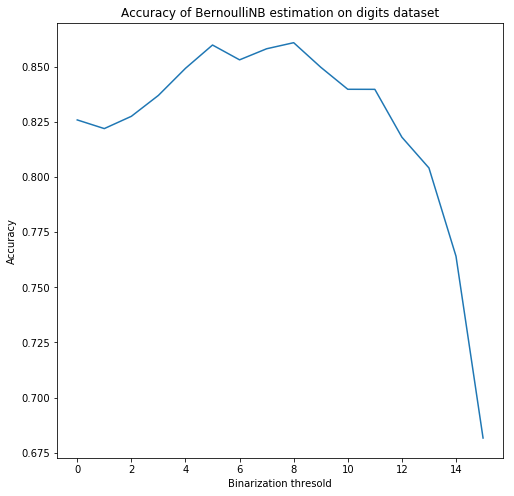

In [18]:
from matplotlib import pyplot
%matplotlib inline

digits_scores_bern = [model_selection.cross_val_score(naive_bayes.BernoulliNB(binarize=threshold),
                                                      digits.data, digits.target).mean() for threshold in xrange(16)]
pyplot.figure(figsize=(8,8))
pyplot.plot(digits_scores_bern)
pyplot.xlabel('Binarization thresold')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy of BernoulliNB estimation on digits dataset')

Видим, что при пороге бинаризации 8 (что соответствует половине максимальной яркости) классификатор с бернуллиевским распределением достигает пика. При этом точность почти такая же, как для мультиномиального распределения!

    1) Максимальное качество классификации на датасете breast_cancer получилось равным 0,94 и достигнуто на классификаторе GaussianNB
    2) Максимальное качество классификации на датасете digits получилось равным 0,87 и достигнуто на классификаторе MultinomialNB
    3)
        (a) Неверно. Вещественными признаками обладает датасет breast_cancer, на котором классификатор с распределением Бернулли показал себя хуже всех и дал точность всего 0.63
        (b) Неверно. На вещественных признаках в датасете breast_cancer классификатор с мультиномиальным распределением сработал хуже, чем классификатор с нормальным: точность 0,89 при максимальной 0,94
        (с) Верно. Выборка digits обладает целыми неотрицательными значениями признаков, и классификатор с мультиномиальным распределением сработал на ней лучше двух других. 
        (d) Верно. Нормальное распределение показало наилучший результат на выборке breast_cancer с вещественными значениями признаков.